## 🧠💡 Intelligent Systems  for Smart Health 👨‍⚕👩‍⚕️🔬🌡️


## Portfolio Exercise 01

# Diabetes prediction

We will again work with data from the NHANES study. But this time we aim to predict something which is a little less dramatic compared to 10-year survival. We want to predict if a patient has **diabetes** or not.

The goal of this portfolio exercise is to complete a full machine learning task from data import to model training an optimization until a final model evaluation.

Good luck!

<a name='import'></a>
## Import Packages

We'll first import all the common packages that we need for this assignment. 

- `shap` is a library that explains predictions made by machine learning models.
- `sklearn` is one of the most popular machine learning libraries.
- `numpy` is a fundamental package for scientific computing in Python.
- `pandas` is what we'll use to manipulate our data.
- `seaborn` is a plotting library which has some convenient functions for visualizing missing data.
- `matplotlib` is a plotting library.

In [1]:
import os
import sklearn
import shap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

e:\Dokumente\MMI\ISfSH\Repo\Intelligente-Systeme\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Portfolio exercises:
## 1. Load and inspect the data 
- What are missing/problematic entries?

In [3]:
path_root = r'E:\Dokumente\MMI\Datascience\DataScience\is'
data_filename = 'NHANES_2017_2018_diabetes.csv'

df = pd.read_csv(os.path.join(path_root, data_filename))

In [4]:
df.head()

SEQN  Gender  AgeInYearsAtScreening  HaveSeriousDifficultySeeing  \
0  93703.0       1                    2.0                          0.0   
1  93704.0       0                    2.0                          0.0   
2  93705.0       1                   66.0                          0.0   
3  93706.0       0                   18.0                          0.0   
4  93707.0       0                   13.0                          0.0   

   HaveSeriousDifficultyHearing  WeightKg  StandingHeightCm  \
0                           0.0      13.7              88.6   
1                           0.0      13.9              94.2   
2                           0.0      79.5             158.3   
3                           0.0      66.3             175.7   
4                           0.0      45.4             158.4   

   BodyMassIndexKgm2  BloodMercuryTotalUgl  BloodManganeseUgl  ...  \
0               17.5                   NaN                NaN  ...   
1               15.7                  0.47               9.41  ...   
2               31.7                  1.07               8.57  ...   
3               21.5                 10.64              14.07  ...   
4               18.1                  0.20              12.60  ...   

   TotalSugarsGm_DR1TOT  BloodLeadUgdl  60SecPulse30SecPulse2  \
0                   NaN            NaN                    NaN   
1                 76.97            NaN                    NaN   
2                 91.55           2.98                   52.0   
3                 14.73           0.74                   82.0   
4                 84.22           0.39                  100.0   

   DirectHdlcholesterolMgdl  TotalCholesterolMgdl  \
0                       NaN                   NaN   
1                       NaN                   NaN   
2                      60.0                 157.0   
3                      47.0                 148.0   
4                      68.0                 189.0   

   SystolicBloodPres2NdRdgMmHg  Smoking  PhysicalActivity  diabetes  \
0                          NaN        0               0.0         0   
1                          NaN        0               0.0         0   
2                          NaN        0               1.0         0   
3                        114.0        0               1.0         0   
4                        128.0        0               0.0         0   

   diabetes_borderline  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 29 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SEQN                                     8366 non-null   float64
 1   Gender                                   8366 non-null   int64  
 2   AgeInYearsAtScreening                    8366 non-null   float64
 3   HaveSeriousDifficultySeeing              8365 non-null   float64
 4   HaveSeriousDifficultyHearing             8365 non-null   float64
 5   WeightKg                                 8242 non-null   float64
 6   StandingHeightCm                         8016 non-null   float64
 7   BodyMassIndexKgm2                        8005 non-null   float64
 8   BloodMercuryTotalUgl                     7513 non-null   float64
 9   BloodManganeseUgl                        7513 non-null   float64
 10  BloodSeleniumUgl                         7513 no

Wie Vollständig sind die Zeilen?

In [6]:
print((df.notnull().sum(axis=0)/len(df) * 100).round(2))

SEQN                                       100.00
Gender                                     100.00
AgeInYearsAtScreening                      100.00
HaveSeriousDifficultySeeing                 99.99
HaveSeriousDifficultyHearing                99.99
WeightKg                                    98.52
StandingHeightCm                            95.82
BodyMassIndexKgm2                           95.68
BloodMercuryTotalUgl                        89.80
BloodManganeseUgl                           89.80
BloodSeleniumUgl                            89.80
BloodCadmiumUgl                             89.80
AnnualFamilyIncome                          87.64
AlcoholGm_DR1TOT                            87.08
CholesterolMg_DR1TOT                        87.08
TotalPolyunsaturatedFattyAcidsGm_DR1TOT     87.08
TotalMonounsaturatedFattyAcidsGm_DR1TOT     87.08
TotalSaturatedFattyAcidsGm_DR1TOT           87.08
TotalFatGm_DR1TOT                           87.08
TotalSugarsGm_DR1TOT                        87.08


Wie viel komplette Zeilen gibt es?

In [7]:
len(df.dropna())

4905

-> Sehr Viel Informationsverlust

Gibt es eventuell fehleinträge?

In [8]:
df.describe()

SEQN       Gender  AgeInYearsAtScreening  \
count    8366.000000  8366.000000            8366.000000   
mean    98320.869950     0.510638              35.830026   
std      2669.896206     0.499917              24.905061   
min     93703.000000     0.000000               1.000000   
25%     96003.250000     0.000000              12.000000   
50%     98332.500000     1.000000              33.000000   
75%    100629.750000     1.000000              59.000000   
max    102956.000000     1.000000              80.000000   

       HaveSeriousDifficultySeeing  HaveSeriousDifficultyHearing     WeightKg  \
count                  8365.000000                   8365.000000  8242.000000   
mean                      0.052481                      0.062762    67.499260   
std                       0.223007                      0.242548    31.377152   
min                       0.000000                      0.000000     8.300000   
25%                       0.000000                      0.000000    48.700000   
50%                       0.000000                      0.000000    69.200000   
75%                       0.000000                      0.000000    86.500000   
max                       1.000000                      1.000000   242.600000   

       StandingHeightCm  BodyMassIndexKgm2  BloodMercuryTotalUgl  \
count       8016.000000        8005.000000           7513.000000   
mean         156.593401          26.577502              1.142698   
std           22.257858           8.260724              2.269646   
min           78.300000          12.300000              0.200000   
25%          151.400000          20.400000              0.200000   
50%          161.900000          25.800000              0.510000   
75%          171.200000          31.300000              1.120000   
max          197.700000          86.200000             63.640000   

       BloodManganeseUgl  ...  TotalSugarsGm_DR1TOT  BloodLeadUgdl  \
count        7513.000000  ...          7.285000e+03    6884.000000   
mean           10.316152  ...          1.065502e+02       1.084214   
std             3.762158  ...          7.318534e+01       1.290628   
min             1.570000  ...          5.397605e-79       0.050000   
25%             7.750000  ...          5.815000e+01       0.460000   
50%             9.710000  ...          9.197000e+01       0.760000   
75%            12.130000  ...          1.362100e+02       1.300000   
max            52.000000  ...          9.311600e+02      42.480000   

       60SecPulse30SecPulse2  DirectHdlcholesterolMgdl  TotalCholesterolMgdl  \
count            6742.000000               6738.000000           6738.000000   
mean               73.749926                 53.392550            179.894627   
std                12.380546                 14.745844             40.602248   
min                34.000000                 10.000000             76.000000   
25%                66.000000                 43.000000            151.000000   
50%                72.000000                 51.000000            176.000000   
75%                82.000000                 61.000000            204.000000   
max               136.000000                189.000000            446.000000   

       SystolicBloodPres2NdRdgMmHg      Smoking  PhysicalActivity  \
count                  6563.000000  8366.000000       8366.000000   
mean                    121.614810     0.135429          0.506096   
std                      20.474269     0.342202          0.707672   
min                      72.000000     0.000000          0.000000   
25%                     106.000000     0.000000          0.000000   
50%                     118.000000     0.000000          0.000000   
75%                     132.000000     0.000000          1.000000   
max                     236.000000     1.000000          2.000000   

          diabetes  diabetes_borderline  
count  8366.000000          8366.000000  
mean      0.101960             0.020918  
std       0.302614             0

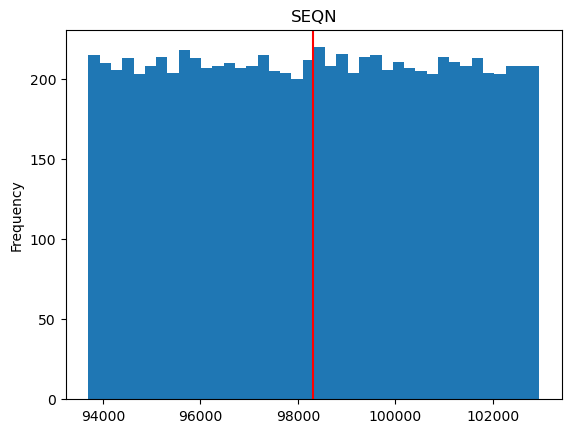

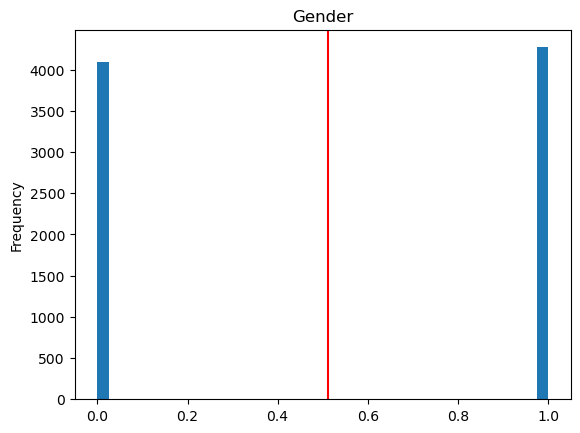

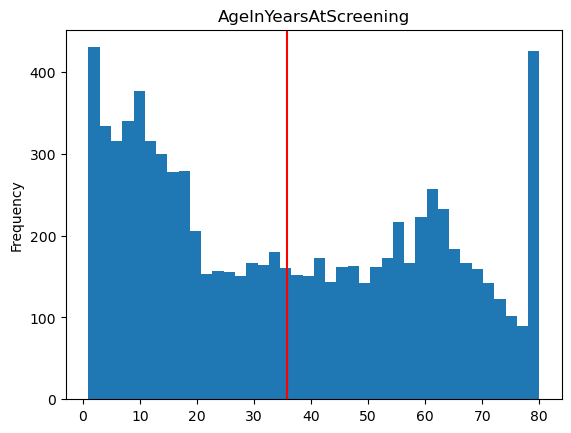

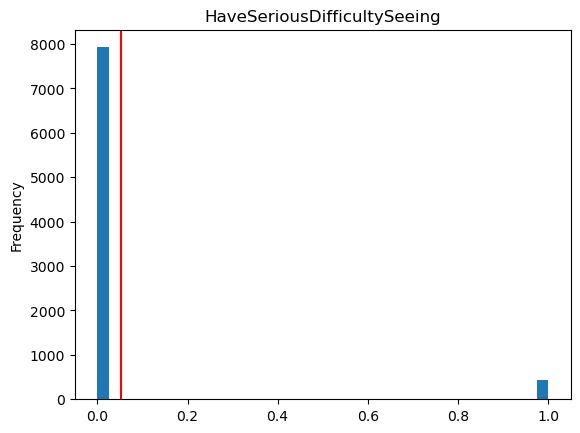

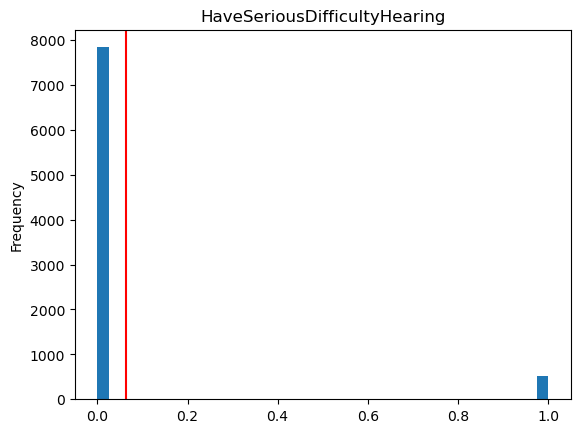

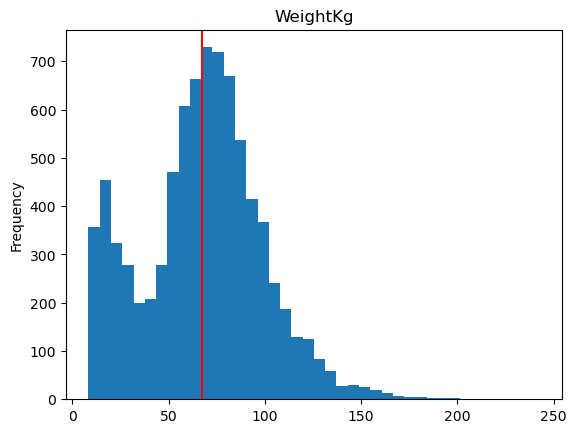

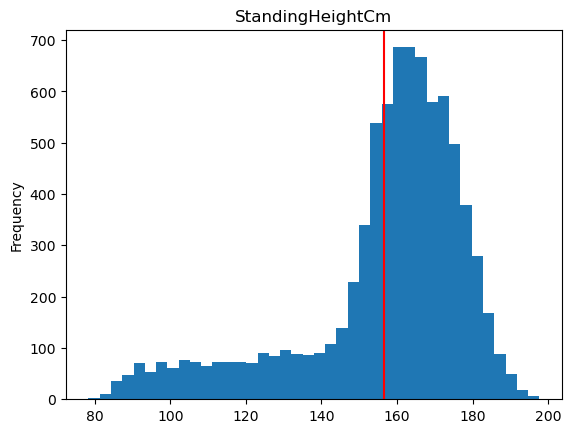

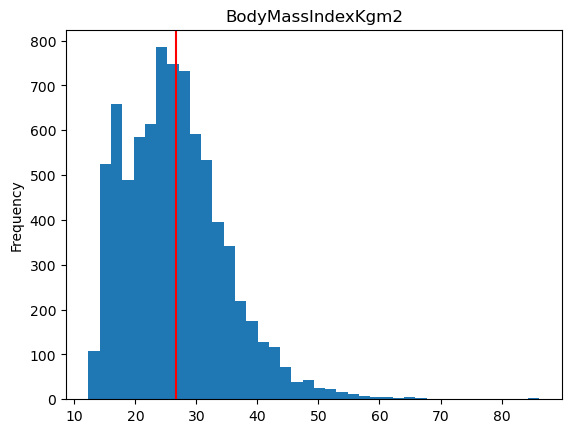

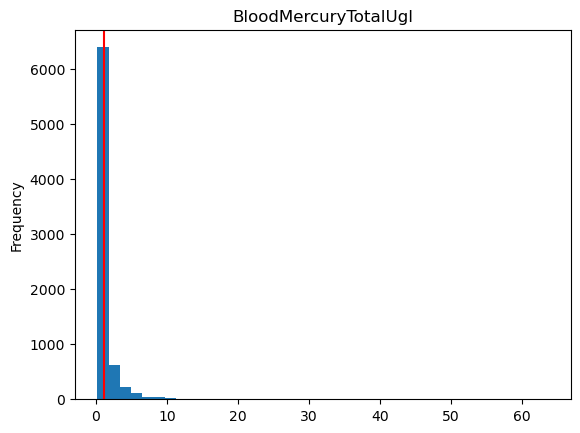

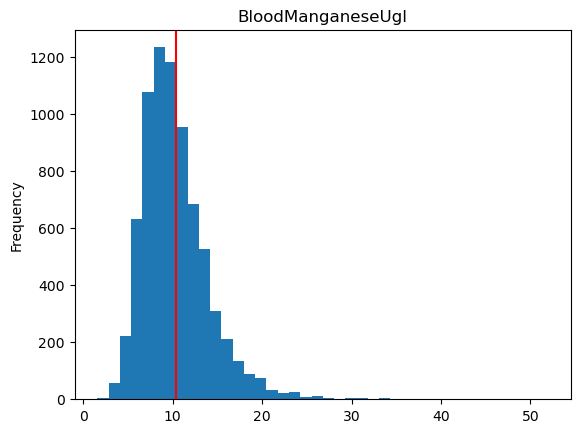

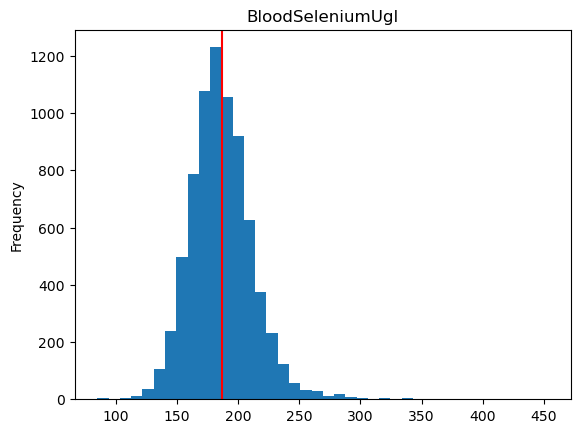

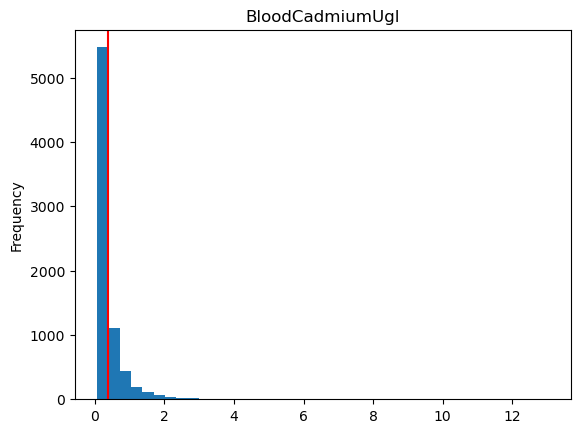

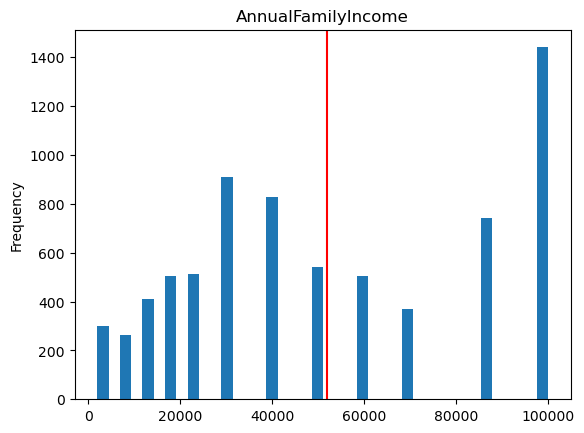

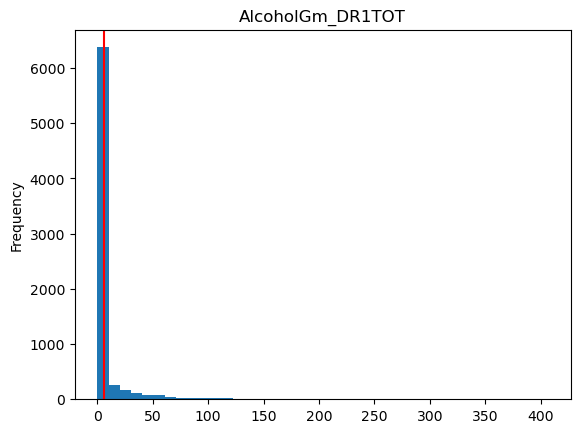

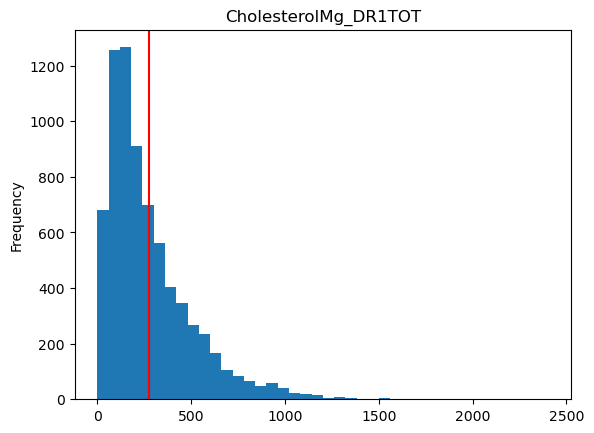

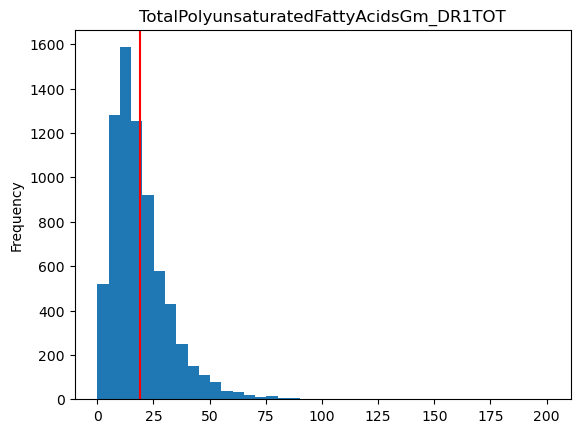

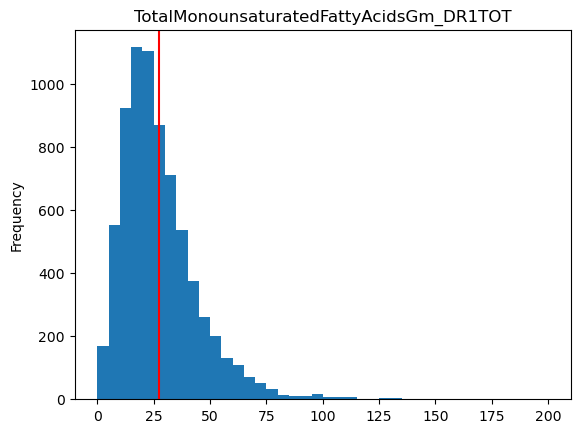

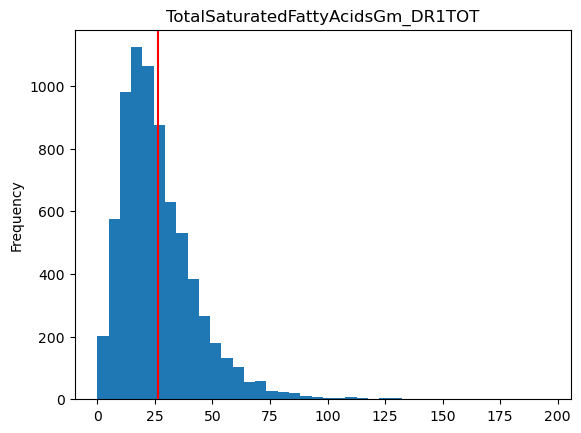

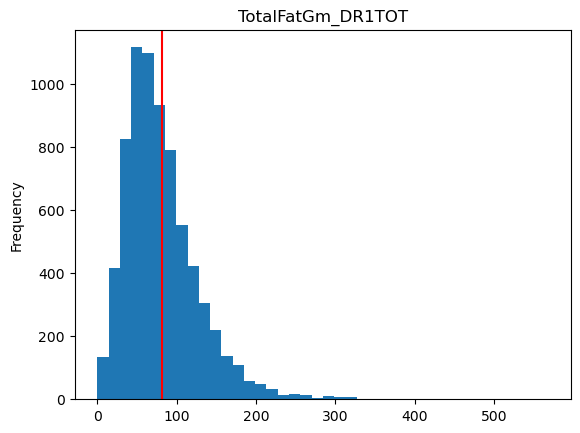

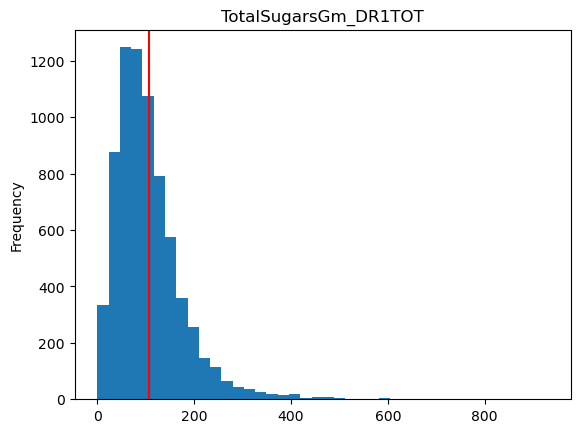

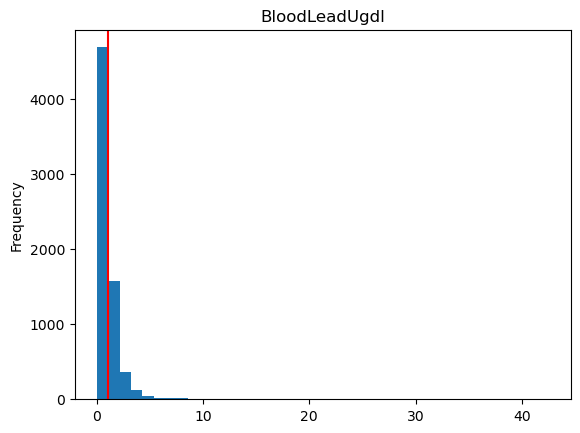

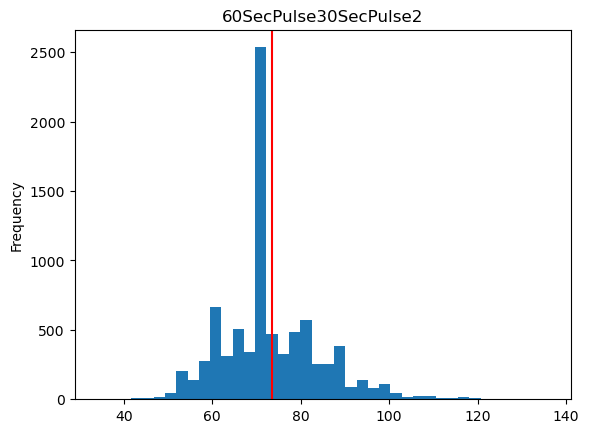

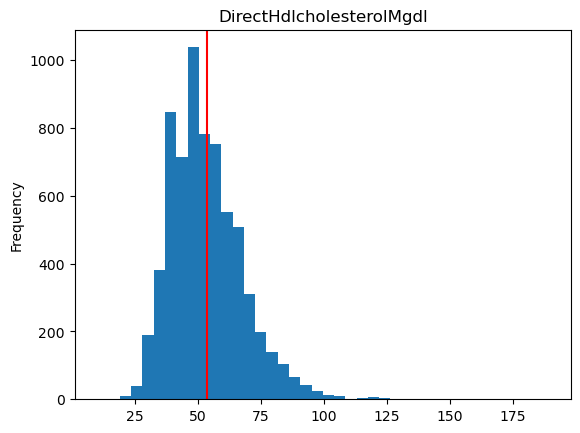

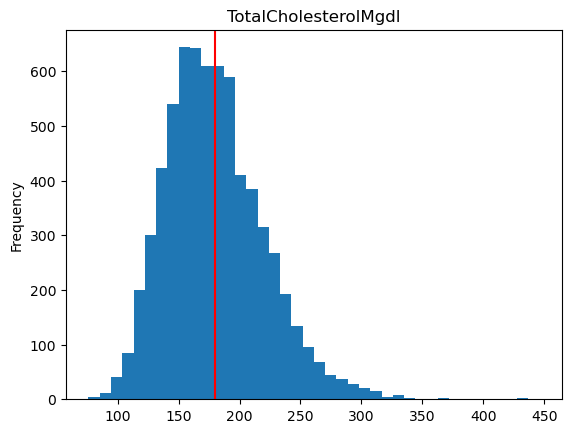

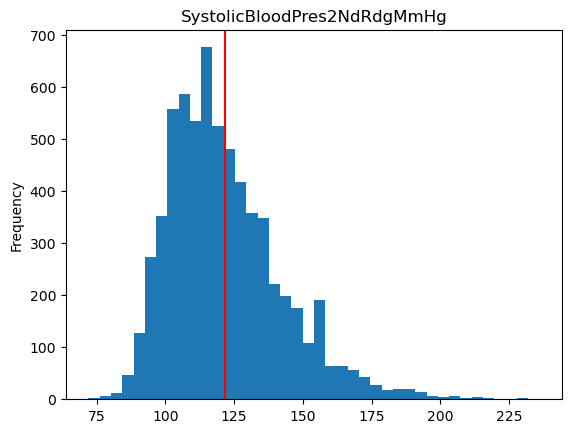

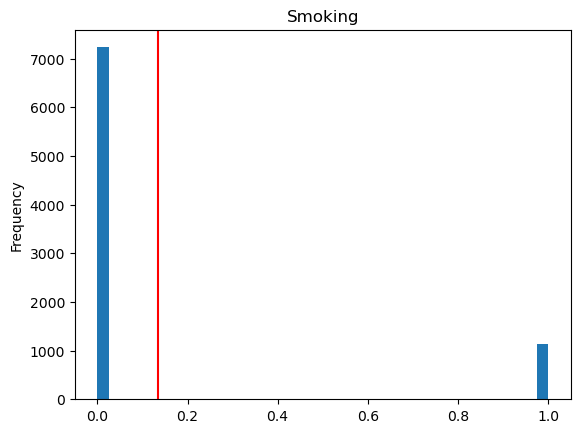

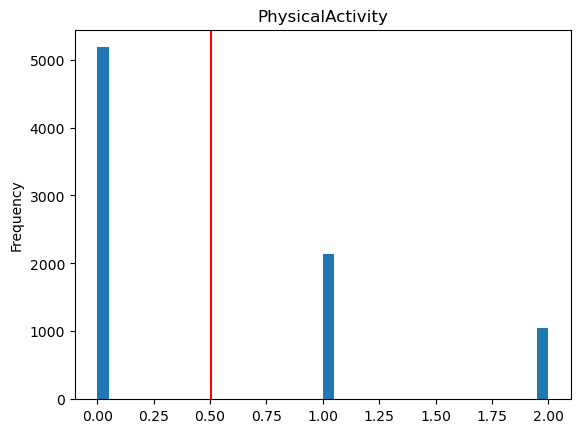

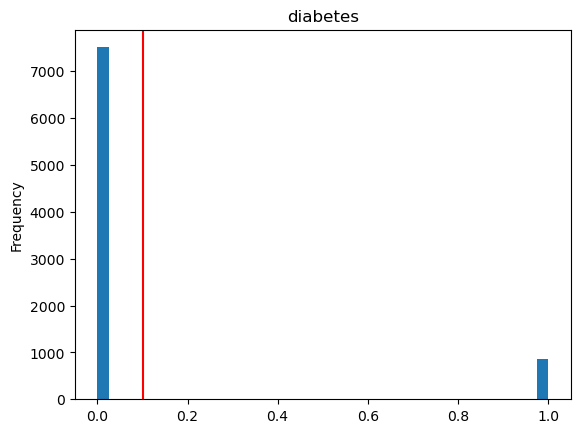

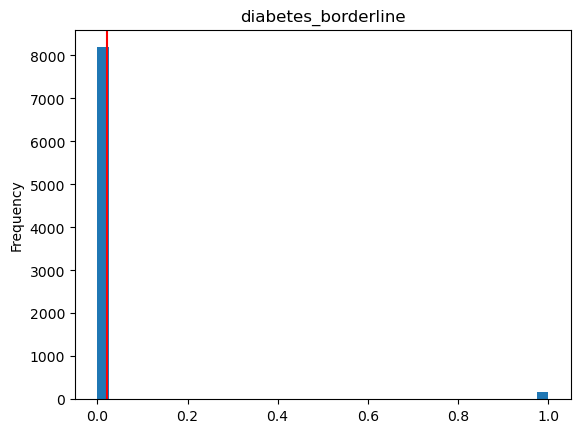

In [44]:
for i in df.columns:
    df[i].plot.hist(bins= 40)
    plt.axvline(df[i].mean(), color='red')
    plt.title(i)
    plt.show()


## 2. Data cleaning 
- Remove, fill, change data (if you think this makes sense or is necessary/beneficial)

Da es sich um eine Medizinische vorhersage handelt bietet die auffüllung durch interploierte werte ein risiko.

Fehlende lücken in WeightKg ,StandingHeightCm oder BodyMassIndexKgm2 könnten ausgerechnet werden, allerdings führt das zu keinen gewinn an der menge an 'kompletten' einträgen.

Da die Spalte '60SecPulse30SecPulse2' einer normalverteilung am nächsten kommt, könnte diese wenn sie wichtig ist interpoliert werden. Dies würde in unseren fall zu keiner erhöhung der Datenmenge führen

In [10]:
median_60SecPulse30SecPulse2 = np.median(df['60SecPulse30SecPulse2'].dropna())
df_imputed = df
df_imputed['60SecPulse30SecPulse2'] = df['60SecPulse30SecPulse2'].fillna(median_60SecPulse30SecPulse2)
print(len(df_imputed.dropna(how='any')))
print(len(df.dropna(how='any')))

4905
4905


**TODO**!!!

In [11]:
print(len(df.drop(columns='WeightKg').dropna()))
print(len(df.drop(columns='StandingHeightCm').dropna()))
print(len(df.drop(columns='BodyMassIndexKgm2').dropna()))

4905
4905
4905


Keine Daten müssen umformatiert werden

In [46]:
cleaned_data = df.dropna()

In [47]:
cleaned_data.value_counts(['diabetes','diabetes_borderline'])

diabetes  diabetes_borderline
0         0                      4179
1         0                       601
0         1                       125
Name: count, dtype: int64

Diabetes und Diabetes_borderline sind exklusiv. Da wir Diabetes predicten wollen sollten wir die Diabetes_borderline spalte entfernen. Sonst lernt das modell: 1 in Diabetes_borderline = Kein Diabetes. Diese entscheidung macht keinen Sinn

In [48]:
cleaned_data = cleaned_data.drop(columns='diabetes_borderline')

In [49]:
len(df[df.diabetes == 1])/len(df)

0.10196031556299306

In [50]:
len(cleaned_data[cleaned_data.diabetes == 1])/len(cleaned_data)

0.12252803261977574

--> Es werden bei der kürzung des Datensatzes mehr nicht Diabetiker verloren. Balance des Datensatzes wird minimal besser.

**'SEQN'** ist lediglich eine ID spalte und kann auch entfernt werden

In [51]:
cleaned_data = cleaned_data.drop(columns='SEQN')

## 3. Inspect correlations among the features 
- Which features do you expect to play a role for a later machine learning model (for predicting diabetes), and why?


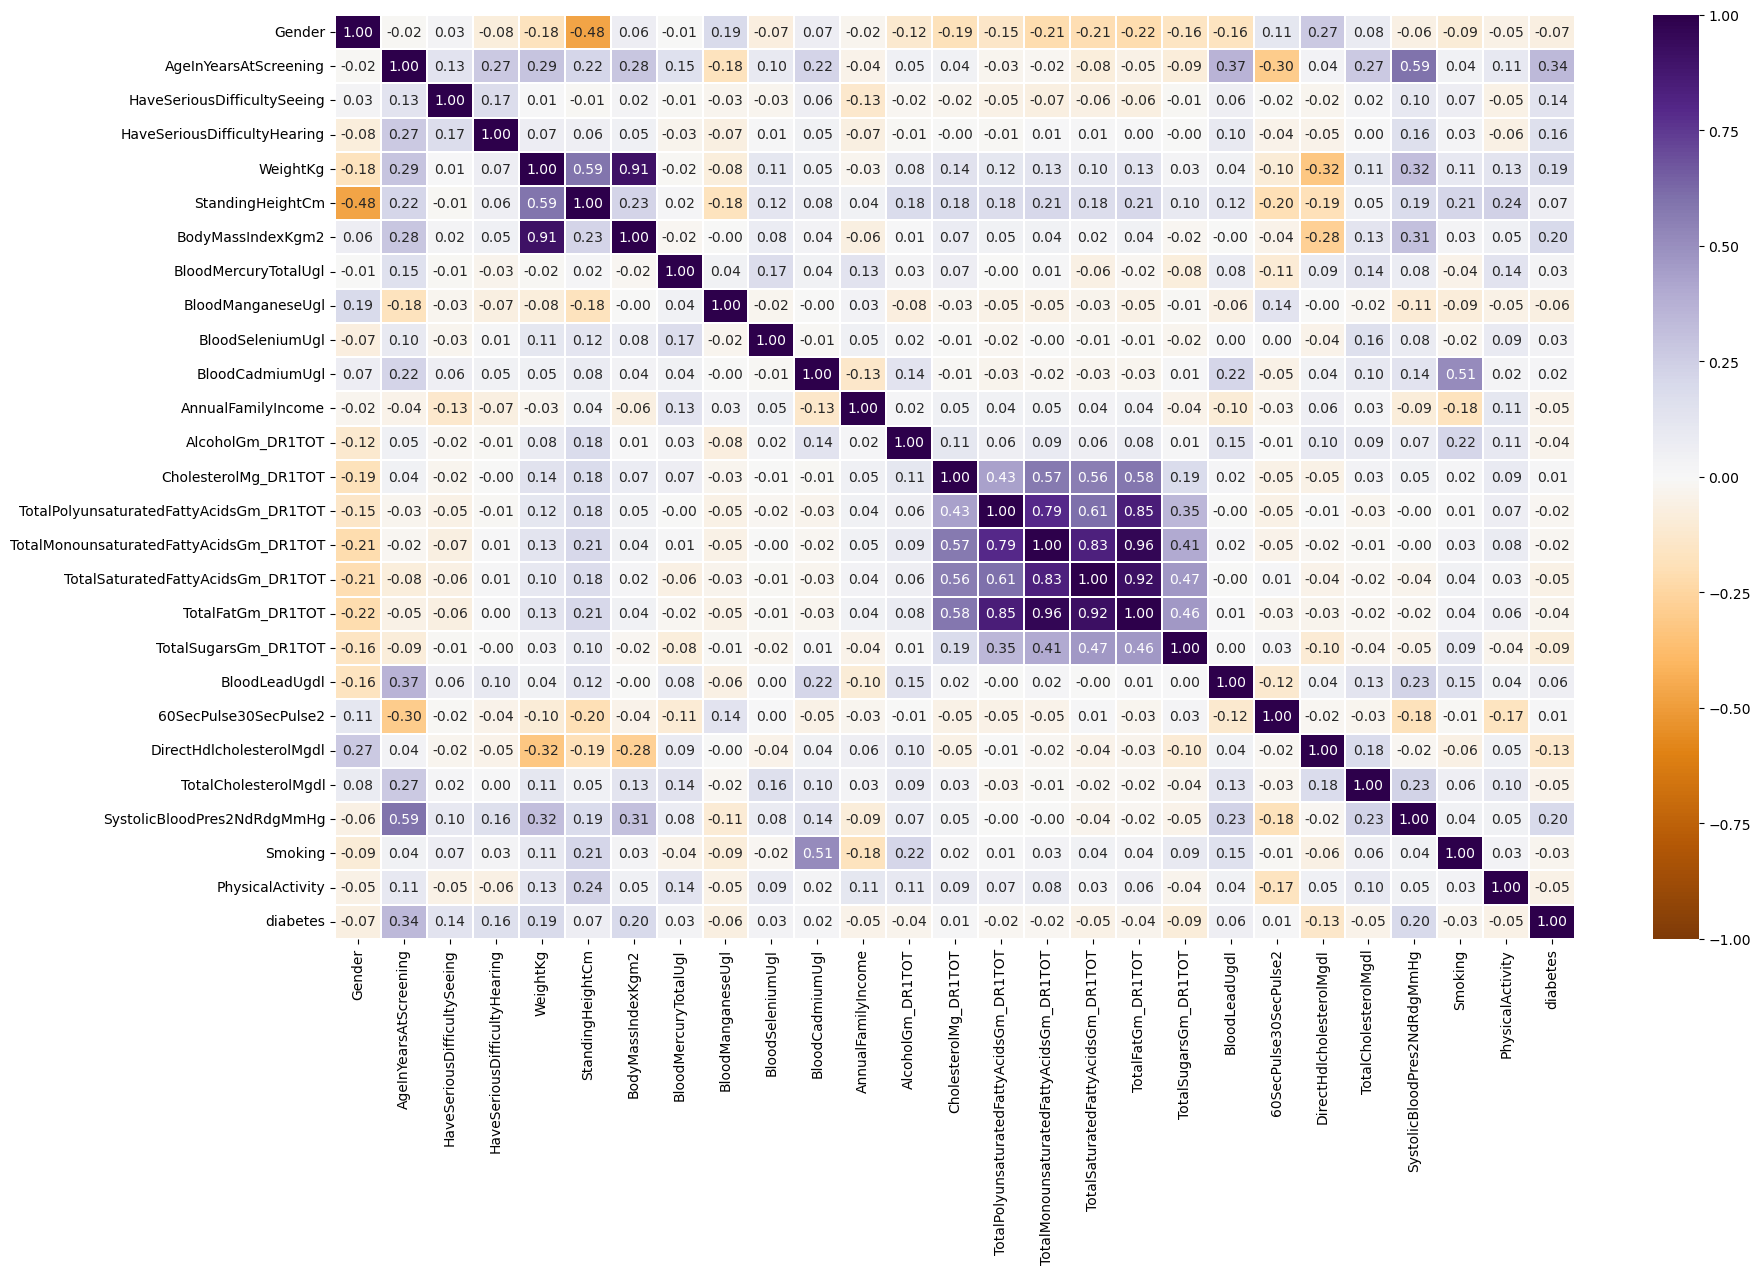

In [53]:
plt.figure(figsize=(20, 12))
matrix = sns.heatmap(cleaned_data.corr(),annot=True,linewidths=0.1,vmax=1,vmin=-1,fmt=".2f", cmap= 'PuOr')

**'BodyMassIndexKgm2'** mit **'WeightKg'** sowie **'TotalFatGm_DR1TOT'** mit **'TotalMonounsaturatedFattyAcidsGm_DR1TOT'** , **'TotalSaturatedFattyAcidsGm_DR1TOT'** und **'TotalPolyunsaturatedFattyAcidsGm_DR1TOT'** sind untereinander stark korreliert (corr<0.8) und können reduziert werden.

Nochwas zu schreiben -> BMI und TotalFat droppen. Die Fettkomponennten bieten viel Diagnosemöglichkeiten

In [19]:
cleaned_data = cleaned_data.drop(columns=['BodyMassIndexKgm2','TotalPolyunsaturatedFattyAcidsGm_DR1TOT','TotalSaturatedFattyAcidsGm_DR1TOT'])

In [20]:
corr = cleaned_data.corr()['diabetes']
corr.abs().nlargest(10)

diabetes                        1.000000
AgeInYearsAtScreening           0.339323
SystolicBloodPres2NdRdgMmHg     0.202029
WeightKg                        0.194029
HaveSeriousDifficultyHearing    0.160687
HaveSeriousDifficultySeeing     0.135759
DirectHdlcholesterolMgdl        0.133994
TotalSugarsGm_DR1TOT            0.088942
StandingHeightCm                0.068194
Gender                          0.066186
Name: diabetes, dtype: float64

An der Korrelationsspalte für Diabetes sieht man welche messwerte eine größere Rolle in der späteren Einordnung führen könnten. Dies schließt schwach Korrelierte werte jedoch nicht aus!

Zu diesen Meswerten gehören:
 - AgeInYearsAtScreening           
 - SystolicBloodPres2NdRdgMmHg
 - WeightKg
 - HaveSeriousDifficultyHearing
 - HaveSeriousDifficultySeeing
 - DirectHdlcholesterolMgdl               


In [21]:
non_binary_cols = [col for col in cleaned_data.columns if sorted(cleaned_data[col].dropna().unique()) not in [[0], [1], [0, 1]]]

In [22]:
non_binary_cols

['AgeInYearsAtScreening',
 'WeightKg',
 'StandingHeightCm',
 'BloodMercuryTotalUgl',
 'BloodManganeseUgl',
 'BloodSeleniumUgl',
 'BloodCadmiumUgl',
 'AnnualFamilyIncome',
 'AlcoholGm_DR1TOT',
 'CholesterolMg_DR1TOT',
 'TotalMonounsaturatedFattyAcidsGm_DR1TOT',
 'TotalFatGm_DR1TOT',
 'TotalSugarsGm_DR1TOT',
 'BloodLeadUgdl',
 '60SecPulse30SecPulse2',
 'DirectHdlcholesterolMgdl',
 'TotalCholesterolMgdl',
 'SystolicBloodPres2NdRdgMmHg',
 'PhysicalActivity']

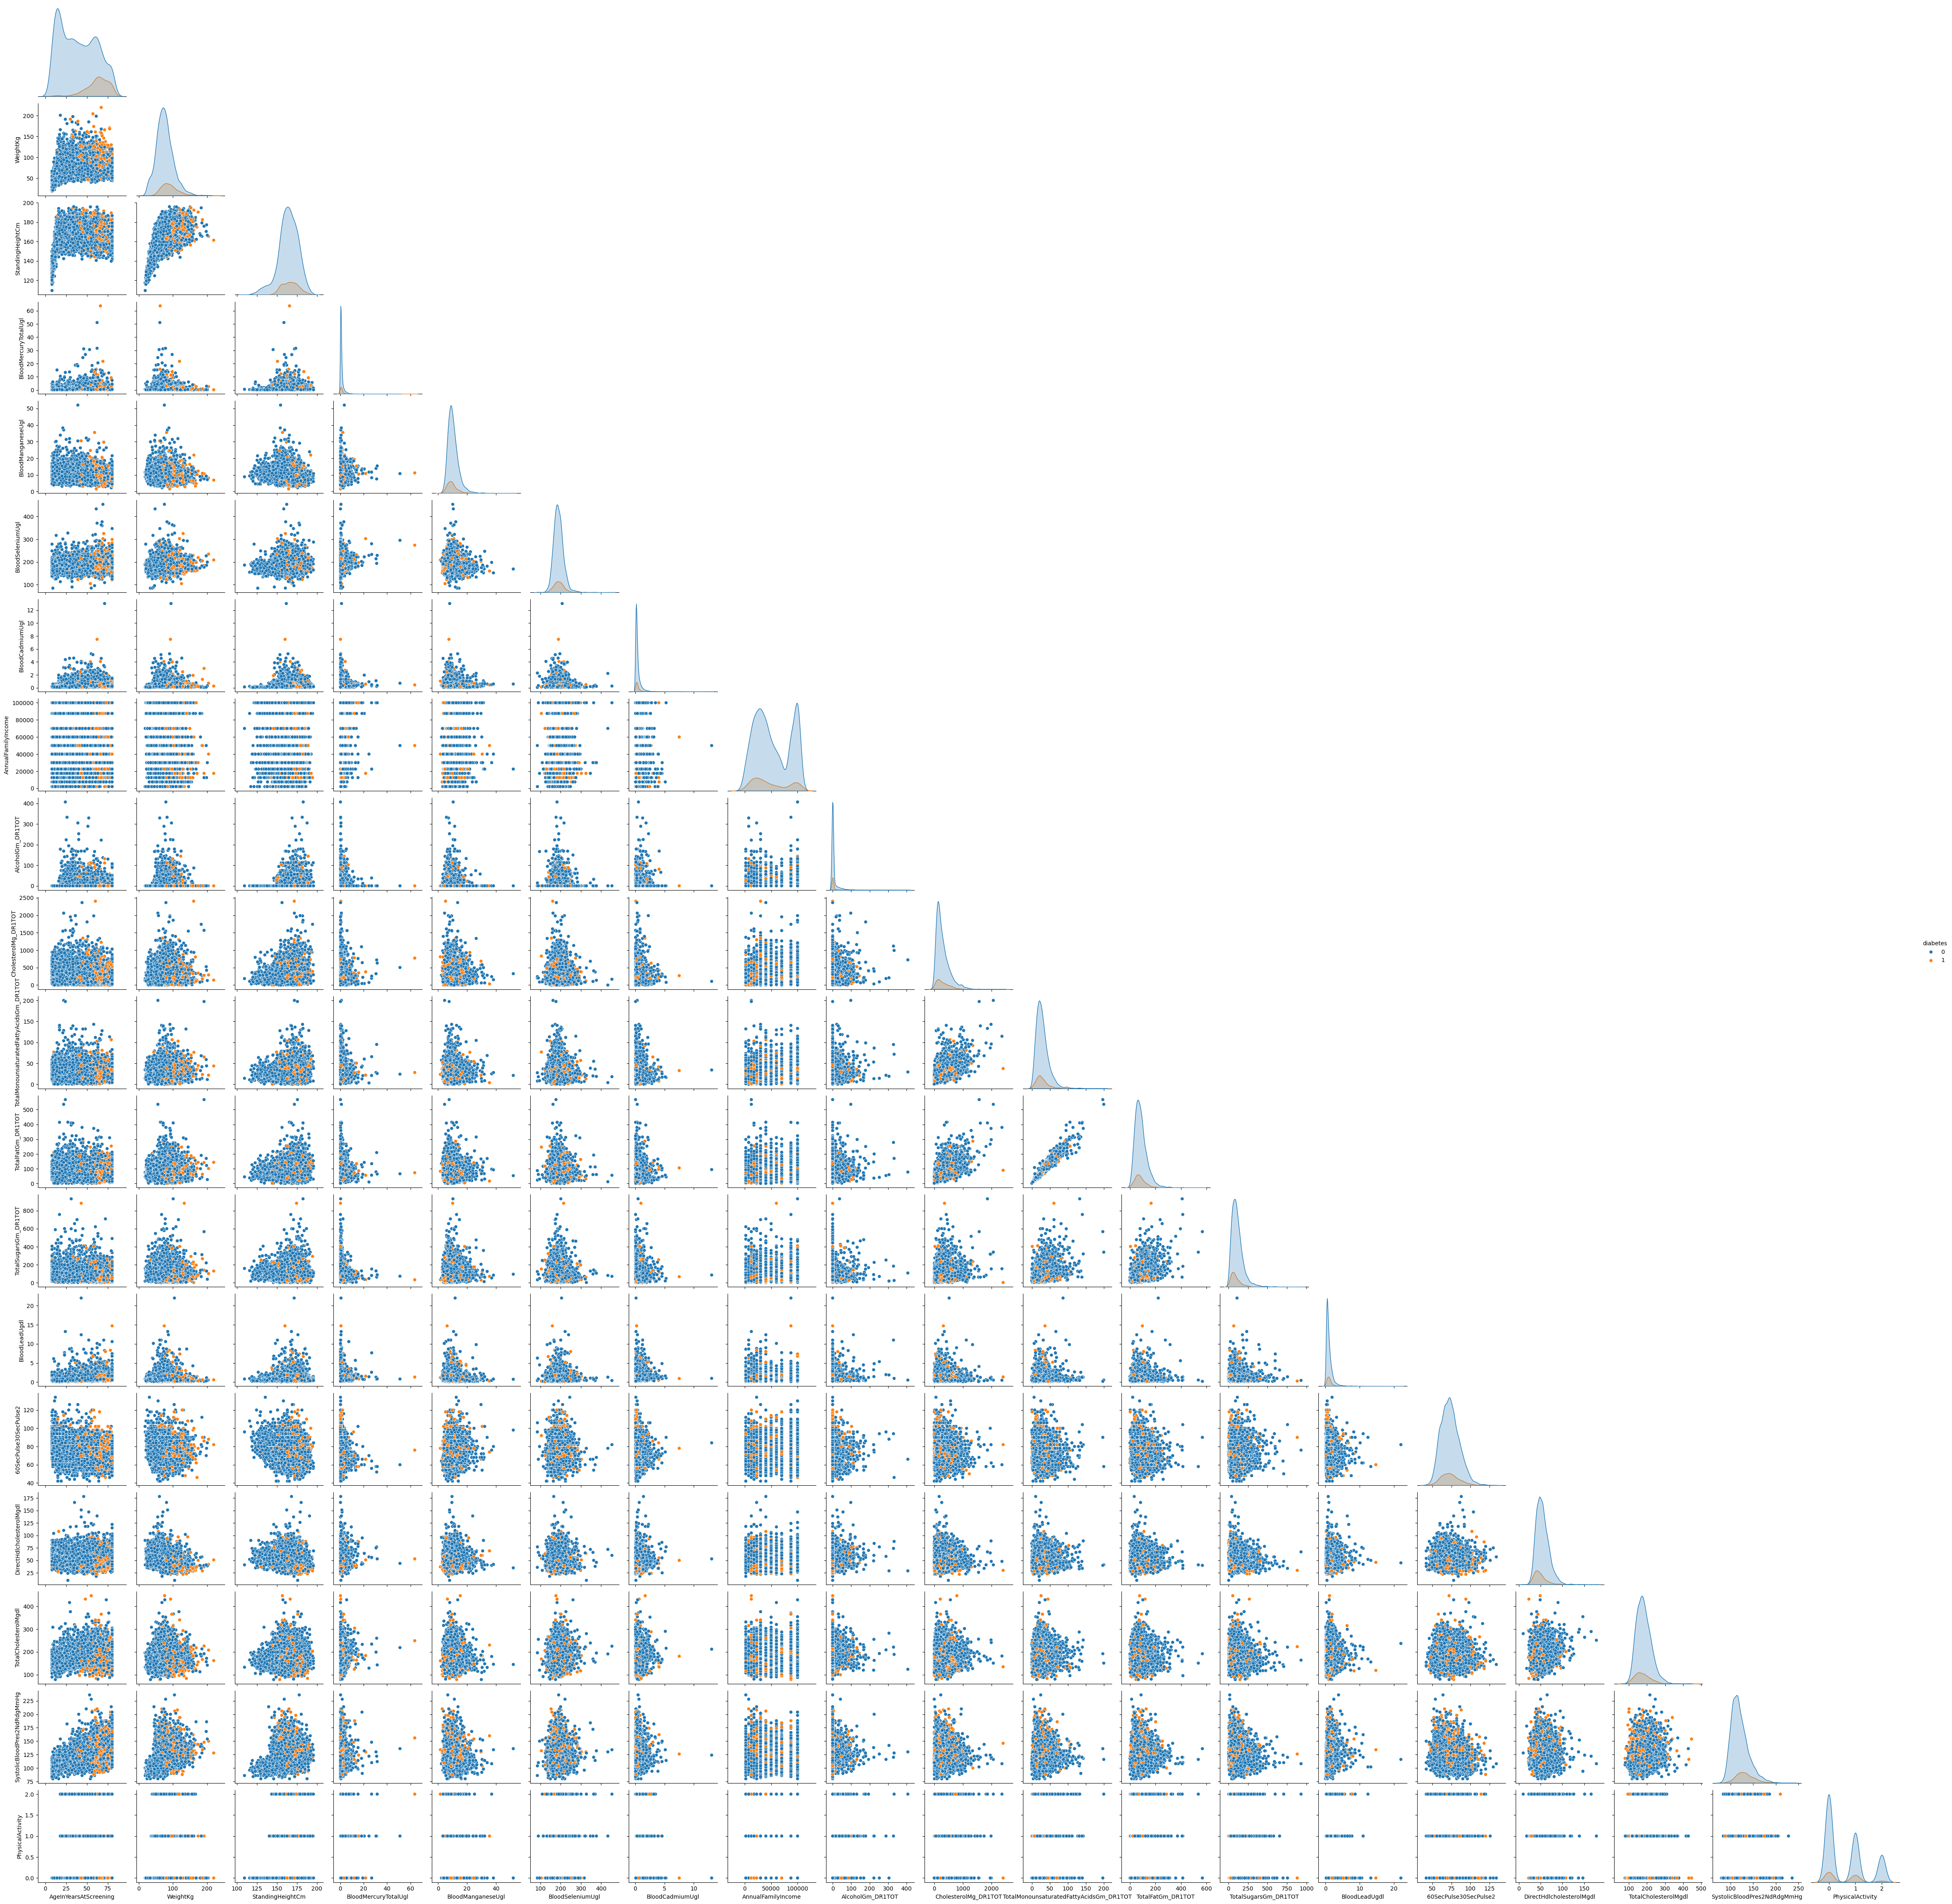

In [ ]:
#sns.pairplot(data=cleaned_data,hue='diabetes', corner=True, vars=non_binary_cols)

Dieser pairplot mit nichtbinären Daten soll dazu dienen Zusammenhänge zu erkennen die nicht direkt von der Korrelation erfasst wurden. Was besonders Auffält das ist das bei einem **'PhysicalActivity'** von 2 Anteils weniger an Diabetes erkrannkt sind.

## 4. Prepare data for machine learning: 
- Separate data and labels
- Split into train ~70% / validation ~15% / test ~15%


In [24]:
X = cleaned_data.drop(['diabetes'], axis='columns')
y = cleaned_data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=10)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                  test_size=0.5, random_state=10)

In [25]:
X_train.shape, X_val.shape, X_test.shape

((3433, 23), (736, 23), (736, 23))

## 5. Train a first model (random forest)
- Use validation and training set to avoid overfitting
- Optimize your hyperparameters with a simple grid search
- Evaluate the model using accuracy, confusion matrix, F1-score, and ROC curve
- How good is the model? What are the main problems?


In [26]:
import lifelines
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

def cindex(y_true, scores):
    return lifelines.utils.concordance_index(y_true, scores)

def plot_confusion_matrix(confusion_matrix):
    """ Simple plot of a confusion matrix using Seaborn's heatmap."""
    plt.figure(figsize=(6, 4), dpi=100)
    sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16},
                cmap="Purples",
                fmt="g")

    # Set labels and title
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title('Confusion Matrix', fontsize=20)

def plot_roc_curve(labels, predicted_labels, dpi=300):
    """
    Plots the Receiver Operating Characteristic (ROC) curve.

    Parameters:
    labels (array-like): True binary labels.
    predicted_labels (array-like): Target scores, can either be probability estimates 
                                   of the positive class or confidence values.

    This function calculates the false positive rate (FPR) and true positive rate (TPR)
    to plot the ROC curve. It also computes the Area Under the Curve (AUC) to assess 
    the performance of the model.

    Example:
        plot_roc_curve(y_true, y_scores)

    """
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = sklearn.metrics.roc_curve(labels, predicted_labels)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = sklearn.metrics.auc(fpr, tpr)

    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(8, 8), dpi=dpi)
    ax.plot(fpr, tpr, color='cornflowerblue', lw=2, 
            label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random chance')  # Diagonal line
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate', fontsize=16)
    ax.set_ylabel('True Positive Rate', fontsize=16)
    ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
    ax.legend(loc="lower right", fontsize=14)
    ax.grid(True)

    # Show the plot
    plt.show()

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4, 7,],
}

scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

forest =RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=forest,
                           param_grid=param_grid,
                           cv=5,                     
                           n_jobs=-1,                
                           verbose=1,
                           scoring=scoring,
                           refit='roc_auc')

In [28]:
grid_search.fit(X_train, y_train)

print(f'Beste Parameter: {grid_search.best_params_}, Score: {grid_search.best_score_}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Beste Parameter: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 200}, Score: 0.8544176486521552


accuracy_score: 0.8899456521739131
f1_score: 0.0898876404494382
recall_score: 0.04878048780487805
precision_score: 0.5714285714285714
ROC AOC: 0.8596628626836728
Test C-Index: 0.8596628626836728 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       654
           1       0.57      0.05      0.09        82

    accuracy                           0.89       736
   macro avg       0.73      0.52      0.52       736
weighted avg       0.86      0.89      0.85       736



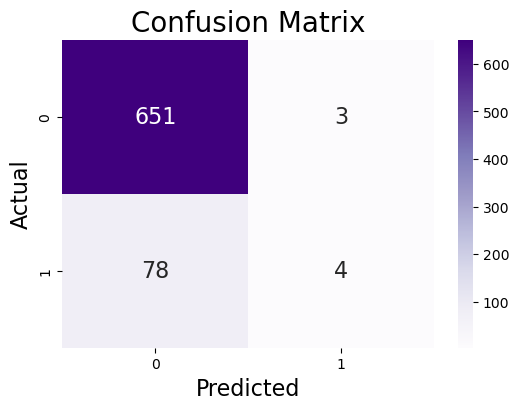

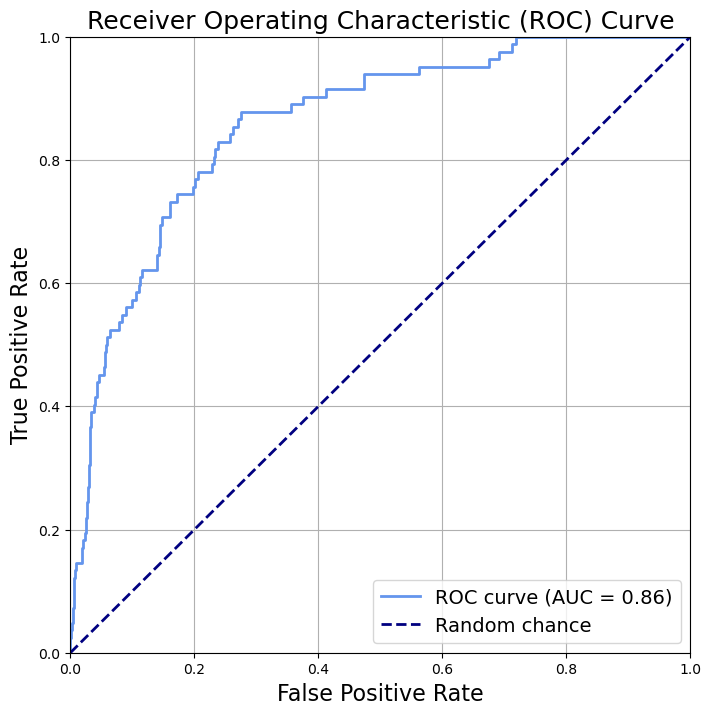

In [29]:
y_test_preds = grid_search.predict(X_test)
y_test_preds_proba = grid_search.predict_proba(X_test)[:, 1]
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_test_preds)
plot_confusion_matrix(conf_matrix)
print(f'accuracy_score: {sklearn.metrics.accuracy_score(y_test, y_test_preds)}')
print(f'f1_score: {sklearn.metrics.f1_score(y_test, y_test_preds)}')
print(f'recall_score: {sklearn.metrics.recall_score(y_test, y_test_preds)}')
print(f'precision_score: {sklearn.metrics.precision_score(y_test, y_test_preds)}')
print(f'ROC AOC: {sklearn.metrics.roc_auc_score(y_test, y_test_preds_proba)}')
print(f'Test C-Index: {cindex(y_test.values, y_test_preds_proba)}', '\n')
print(sklearn.metrics.classification_report(y_test, y_test_preds))
plot_roc_curve(y_test,y_test_preds_proba, dpi=100)

In [30]:
654/82

7.975609756097561

Das model bietet mit den Besten gefundenen Hyperparametern immernoch einen sehr schlechten R1 score. Dies ist sehr klar auf eine starkes ungleichgewicht der Lable im Daten zurückzuführen. Es gibt ~8 mal mehr daten der negativen Klasse (Kein Diabetes). Das modell bekommt höhere werte in manchen Metriken, weil es hauptsächlich kein Diabetes festellt.

## 6. Check if labels are balanced
- If the data is not balanced enough, try to mitigate this problem (e.g. by oversampling or adding class weights).
- Use any hyperparameter search strategy you know (grid search, random search, or Bayesian search)
- Use the same evaluation metrics as above to inspect the quality of your model.


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [32]:
param_distributions = {
    'n_estimators': randint(100, 500),         
    'max_depth': randint(5, 50),                 
    'min_samples_split': randint(2, 20),         
    'min_samples_leaf': randint(1, 10),
}

random_random_forest = RandomForestClassifier(random_state=0, class_weight={False:1 , True:8})

random_search = RandomizedSearchCV(
    estimator=random_random_forest,
    param_distributions=param_distributions,
    n_iter=150,                   
    scoring='f1',                
    cv=5,
    verbose=1,
    random_state=0,
    n_jobs=-1
)

In [33]:
random_search.fit(X_train, y_train)

print(f'Beste Parameter: {random_search.best_params_}, Score: {random_search.best_score_}')

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Beste Parameter: {'max_depth': 25, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 461}, Score: 0.48710285256105246


accuracy_score: 0.876358695652174
f1_score: 0.4678362573099415
recall_score: 0.4878048780487805
precision_score: 0.449438202247191
ROC AOC: 0.8630379652420378
Test C-Index: 0.8630379652420378 

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       654
           1       0.45      0.49      0.47        82

    accuracy                           0.88       736
   macro avg       0.69      0.71      0.70       736
weighted avg       0.88      0.88      0.88       736



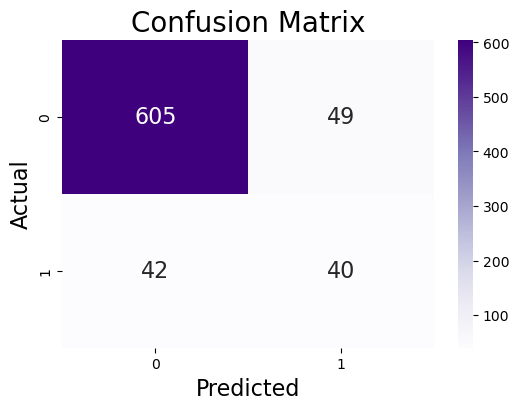

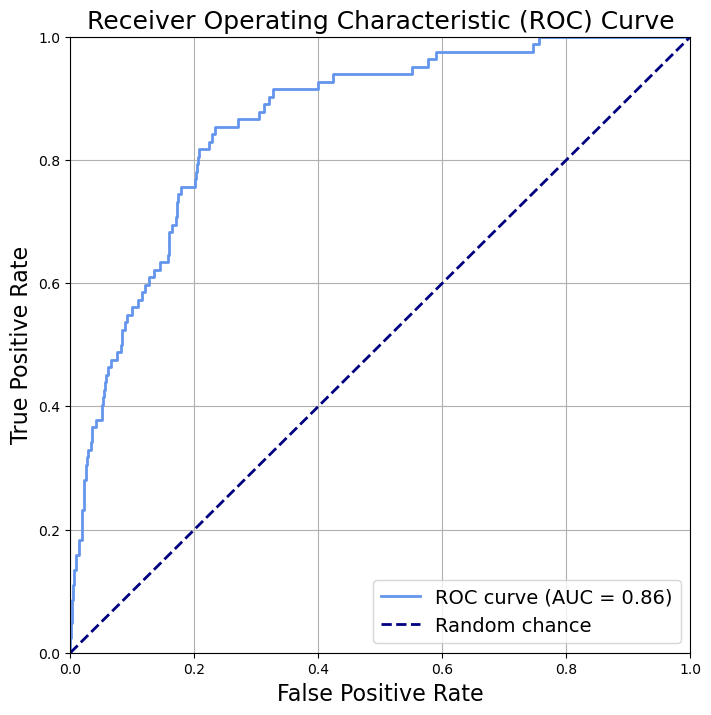

In [34]:
y_test_preds = random_search.predict(X_test)
y_test_preds_proba = random_search.predict_proba(X_test)[:, 1]
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_test_preds)
plot_confusion_matrix(conf_matrix)
print(f'accuracy_score: {sklearn.metrics.accuracy_score(y_test, y_test_preds)}')
print(f'f1_score: {sklearn.metrics.f1_score(y_test, y_test_preds)}')
print(f'recall_score: {sklearn.metrics.recall_score(y_test, y_test_preds)}')
print(f'precision_score: {sklearn.metrics.precision_score(y_test, y_test_preds)}')
print(f'ROC AOC: {sklearn.metrics.roc_auc_score(y_test, y_test_preds_proba)}')
print(f'Test C-Index: {cindex(y_test.values, y_test_preds_proba)}', '\n')
print(sklearn.metrics.classification_report(y_test, y_test_preds))
plot_roc_curve(y_test,y_test_preds_proba, dpi=100)

## 7. Explainability
- Use SHAP to plot the importance of each feature for the predictions
- Use SHAP for two individual predictions: one person with the prediction "diabetes", and one person with lower risk.
- Small check: Train another model (same hyperparameters), but remove the data of the 10 least important features. How does this affect your model performance?


In [62]:
forest_model = RandomForestClassifier(random_state=0, class_weight={False:1 , True:8}, max_depth =  25, min_samples_leaf = 8, min_samples_split= 6, n_estimators= 461)

forest_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={False: 1, True: 8}, max_depth=25,
                       min_samples_leaf=8, min_samples_split=6,
                       n_estimators=461, random_state=0)

In [ ]:
explainer = shap.TreeExplainer(forest_model)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap_values.shape()

In [61]:
shap_values[:,:,1]

array([[ 8.04599764e-03,  1.06915983e-01,  2.39913056e-02, ...,
         3.75465049e-02,  1.54230332e-03,  7.25084156e-03],
       [ 3.51094993e-03, -3.71743478e-01, -6.07161678e-03, ...,
         1.53916678e-02, -1.45745761e-02,  6.51391143e-04],
       [ 2.09883736e-03, -2.80961028e-01, -5.46527168e-03, ...,
        -5.44739785e-02,  4.54549637e-04,  3.93705074e-03],
       ...,
       [-3.89333498e-03, -2.34840614e-01, -5.62552021e-03, ...,
        -7.12880534e-02,  5.39350636e-04, -5.11410496e-04],
       [ 2.30043082e-03, -2.41372724e-01, -5.78253335e-03, ...,
        -6.98335734e-02,  4.85266424e-04,  7.47012733e-04],
       [ 1.94767940e-03,  1.70224738e-02, -4.91078923e-03, ...,
        -2.27628804e-02, -1.16505975e-02, -3.19978741e-04]])

In [57]:
print(shap_values[1].shape)
print(X_train.T.shape)

(23, 2)
(23, 3433)


In [58]:
shap.summary_plot(shap_values[1], X_train.T, plot_type="bar")

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [59]:
shap.summary_plot(shap_values[1], X_train)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

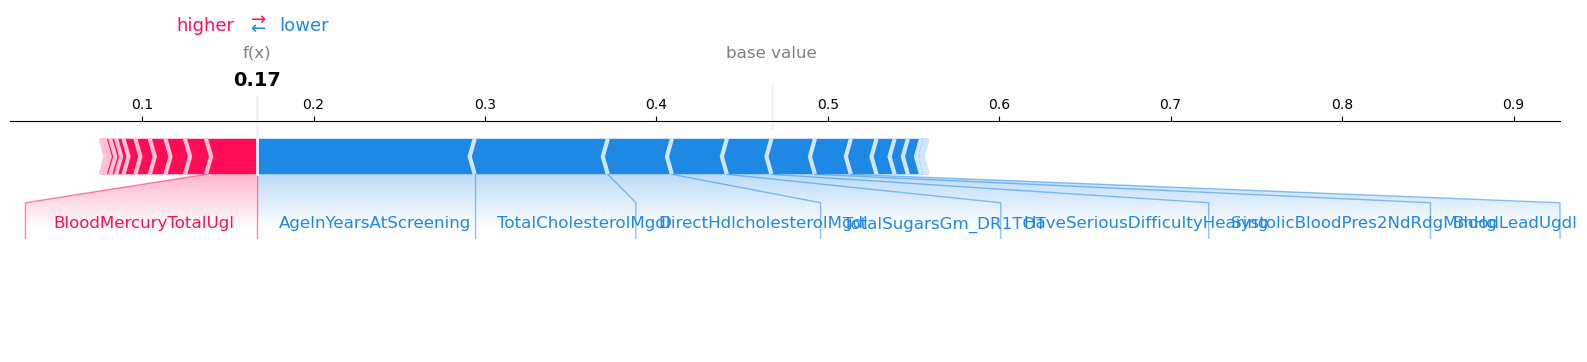

In [ ]:
explainer = shap.TreeExplainer(forest_model)# add your code
shap_values = explainer.shap_values(X_test.loc[patientID])
prediction_class = 0
shap.force_plot(
    explainer.expected_value[prediction_class], shap_values[:, prediction_class],
    feature_names=X_test.columns,
    matplotlib=True
)

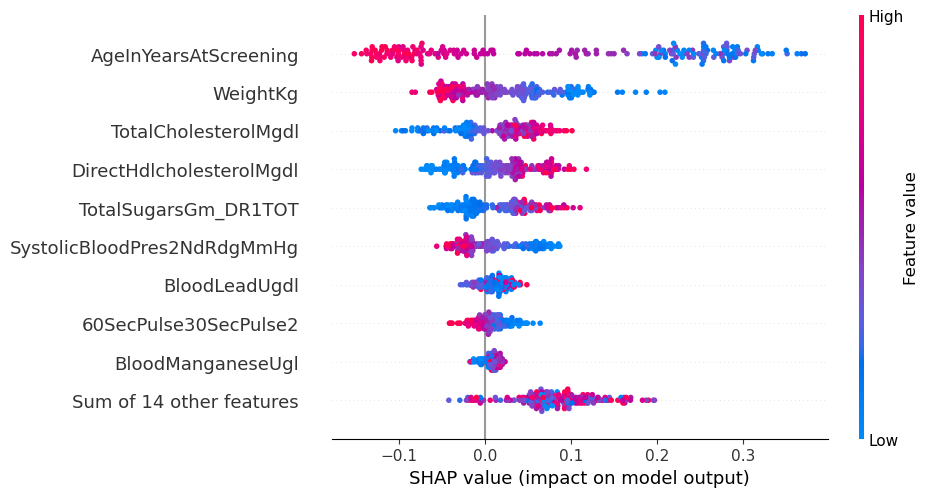

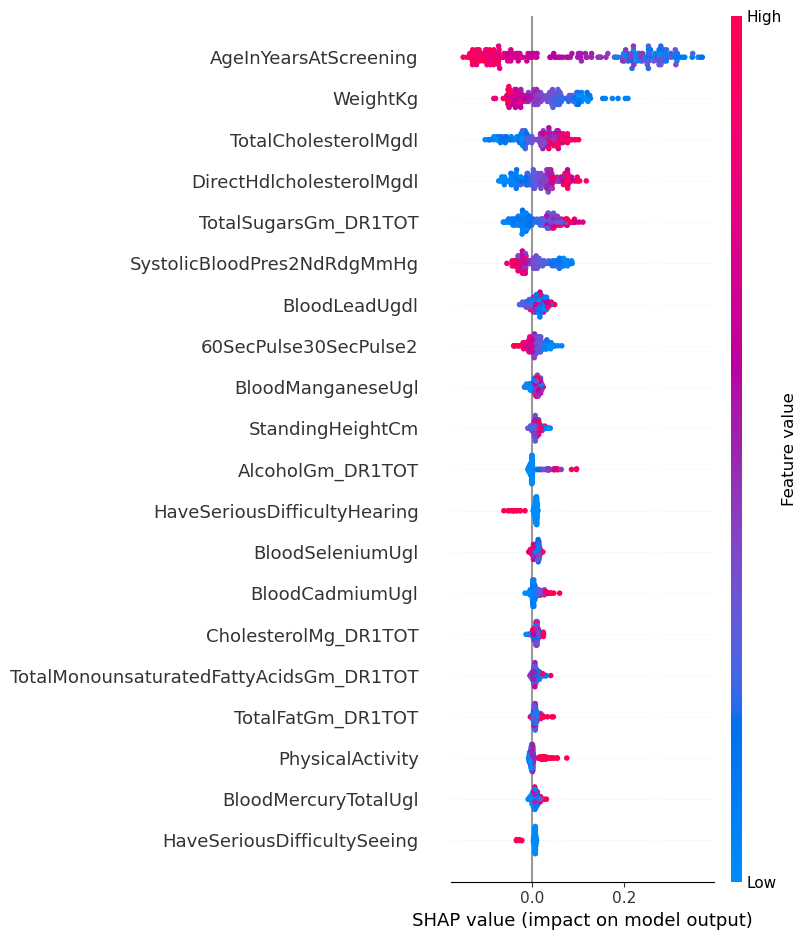

In [ ]:
shap_values = explainer(X_train.iloc[:200, :], check_additivity=False)
shap.plots.beeswarm(shap_values[:,:,0])
shap.summary_plot(shap_values[:,:,0])

In [60]:
feature_importance = pd.DataFrame(
    forest_model.featureimportances,
    columns=["feature_importance"],
    index=X_train.columns
)
feature_importance.sort_values("feature_importance", ascending=False).nlargest

AttributeError: 'RandomForestClassifier' object has no attribute 'featureimportances'

## 8. Conclusion
- How good is your model? How well can you predict diabetes?
- Could such a model be improved further? If so, what could be done to improve the model?
- Compare your results to current research [Dinh et al., 2019](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-0918-5). This is not 100% the same data, so don't worry if you cannot compare your results 1:1 with the results from the article. But their work is at least somewhat comparable. Two specific questions to answer: Is your model of comparable type to what they used in their study? And could you achieve a comparable model performance (roughly) ?

Another article (optional, only you're interested): [Vangeepuram et al., 2021](https://www.nature.com/articles/s41598-021-90406-0#Tab1) 


## Final portfolio submission:
Your task is to address all the above-mentioned points in this notebook. Please:
- Use markdown cells to structure your notebook along the above-mentioned headers
- Use markdown cells to interpret, summarize, comment on your results, or to explain your choices.
- Normal in-line or Python code comments are fine, but better only use them to comment on minor points or code details (they can easily be overlooked during grading of the notebook).
- This notebook (and all others that will follow) are part of your portolio exam and must be **individual contributions**. It is fine to exchange ideas and discuss things. But in the end everyone is supposed to solve their own notebooks!